### Multiclass Classification

Identify the hand written digit.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits #sklearn.datasets have some pre defined dataset, we can use in ML.


In [5]:
digits = load_digits()

In [6]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

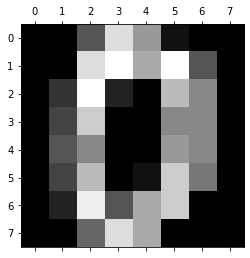

In [15]:
plt.gray()
plt.matshow(digits.images[0])

**data[0]** & **images[0]** are same but the actual difference is **data[0]** represents the **numaric data** whether **images[0]** represents the **real image**.

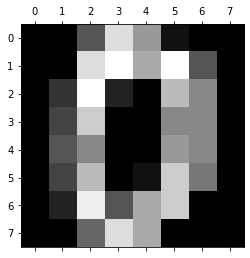

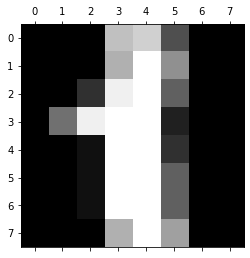

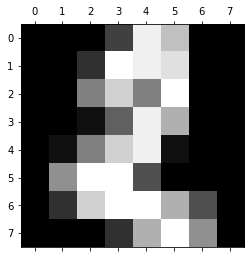

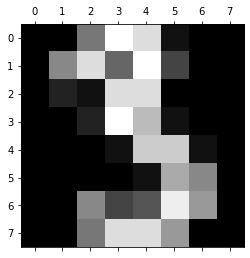

In [16]:
# print 5 image
for i in range(4):
    plt.matshow(digits.images[i])

In [17]:
digits.target[0:4]

array([0, 1, 2, 3])

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

/home/ahmadun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
model.score(x_test, y_test)

0.9638888888888889

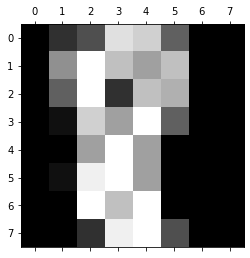

In [36]:
plt.matshow(digits.images[76])

In [37]:
digits.target[76]

8

In [39]:
model.predict([digits.data[76]])

array([8])

In [40]:
model.predict(digits.data[0:4])

array([0, 1, 2, 3])

### Find where modlel will fail
we need to use **confusion matrix** to find the failure point of model.

In [44]:
y_predicted = model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

cm  # This visualization is produced better in seaborn or matlab

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1, 39,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 26,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  1, 36]])

### Visualize cm using seaborn

Text(69.0, 0.5, 'truth')

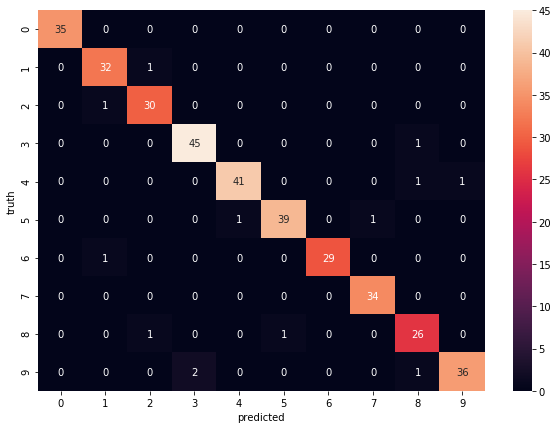

In [49]:
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')